# Day2 July 31

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import joblib
from plotly.subplots import make_subplots
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error, root_mean_squared_error
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import learning_curve

# Loading the Datasets

In [2]:
df = pd.read_csv("Datasets/Housing.csv")

In [3]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# Initial Data Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [7]:
df.shape

(545, 13)

In [8]:
df.index

RangeIndex(start=0, stop=545, step=1)

In [9]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Checking for missing values

In [10]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Duplicated values

In [11]:
df.duplicated().sum()

np.int64(0)

# Price histogram

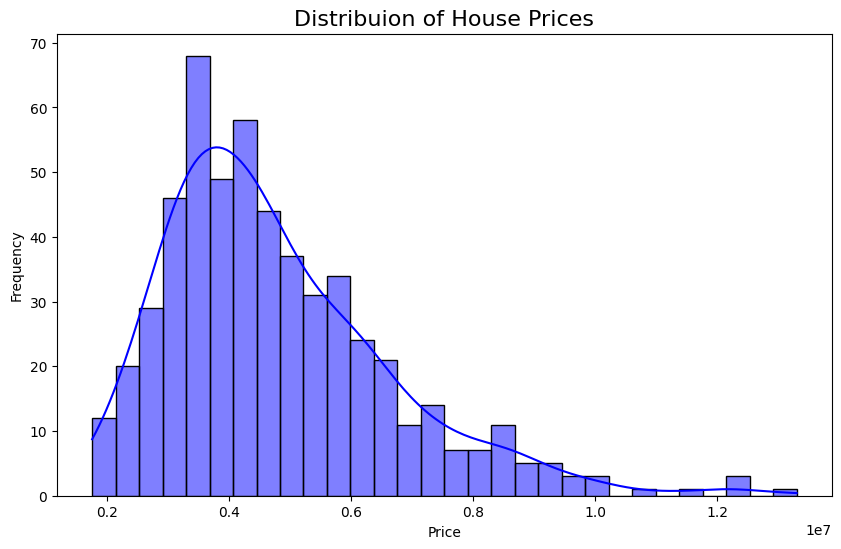

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],kde=True,color='blue',bins=30)
plt.title('Distribuion of House Prices',fontsize=16)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

## this is +ve skewed histogram which has more variance(mode>median>mean) than normal(mode=median=mean) distribution so we convert it to normal distribution using log transformation

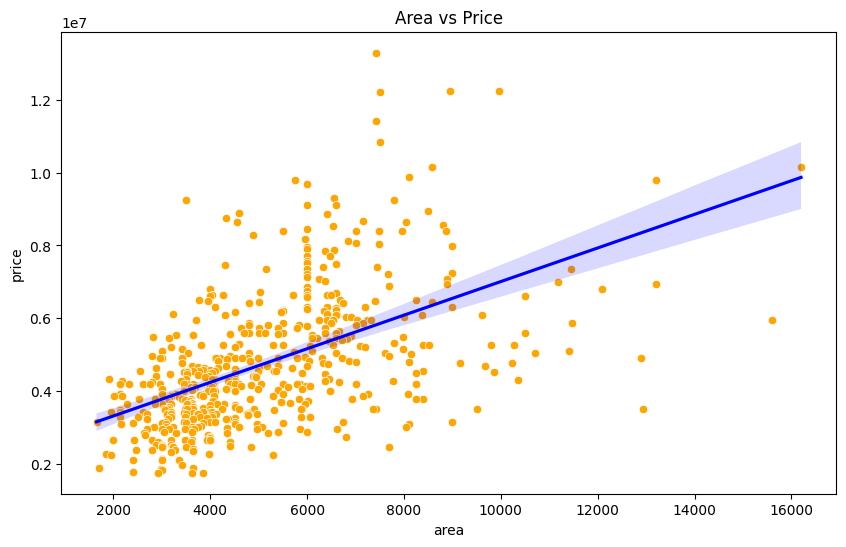

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='area',y='price',data=df,color='orange')
sns.regplot(x='area',y='price',data=df,scatter=False,color='blue') # regression plot (draws a reg line)
plt.title('Area vs Price')
plt.show()

# 3D plot

In [14]:
fig = px.scatter(df,x='area',y='price',
                color='furnishingstatus',
                title='Price vs Area Colored by Furnishing Status',
                size='stories',
                hover_data=['bedrooms','bathrooms','parking'])
fig.show()

# Box plot for numerical columns

In [15]:
numerical_cols = df.select_dtypes(include='number').columns

df_melted = df[numerical_cols].melt(var_name='Feature',value_name='Value')

fig = px.box(df_melted,x='Feature',y='Value',color='Feature',
            title="Box Plot for all Numerical Features",
            color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_layout(title_font_size=22,xaxis_title="Feature",yaxis_title='Value',template='plotly_white',showlegend=False)

fig.show()

For checking, defining and removing:
1: Statistical plot:Histogram (bell curver) -> normal distribution
2: Quantile plot

* Hypothesis testing
p-value testing -> Normal distribution checking for dataset 
p > 0.05 (5%) -> Normal(accept)
q1-(our estimate on how strict we make outliers)

## Day 3

In [16]:
# Set a modern Seaborn style
sns.set(style='whitegrid',palette='pastel',font_scale=1.2)

In [17]:
# function to check if data is normally distributed using Shapiro test
def is_normal(data,alpha=0.05):
    stat,p = stats.shapiro(data)
    return p > alpha,p

In [18]:
#Function to plot histogram + KDE and Q-Q plot side by side
def plot_distruibution_and_qq(data,column):
    values = data[column].dropna()
    normal,p_val = is_normal(values)

    #Title not 
    note  = 'Likely Normla' if normal else ' Not normal'
    title_text = f'{column} ({note},p={p_val:3f})'

    # Create subplots
    fig,axes = plt.subplots(1,2, figsize=(14,6))

    #Histogram + KDE
    sns.histplot(values, kde=True, color='cornflowerblue',edgecolor='black',ax=axes[0])
    axes[0].set_title('Histogram with KDE',fontsize=14)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    axes[0].grid(True,linestyle='--',alpha=0.5)

    # Q-Q plot
    stats.probplot(values,dist='norm',plot=axes[1])
    axes[1].set_title('Q-Q Plot (Normal Distribution)',fontsize=14)
    axes[1].grid(True,linestyle='--',alpha=0.5)

    # Overall tile
    fig.suptitle(title_text,fontsize=16,fontweight='bold',color='darkblue')
    plt.tight_layout(rect=(0,0,1,0.95))
    plt.show()

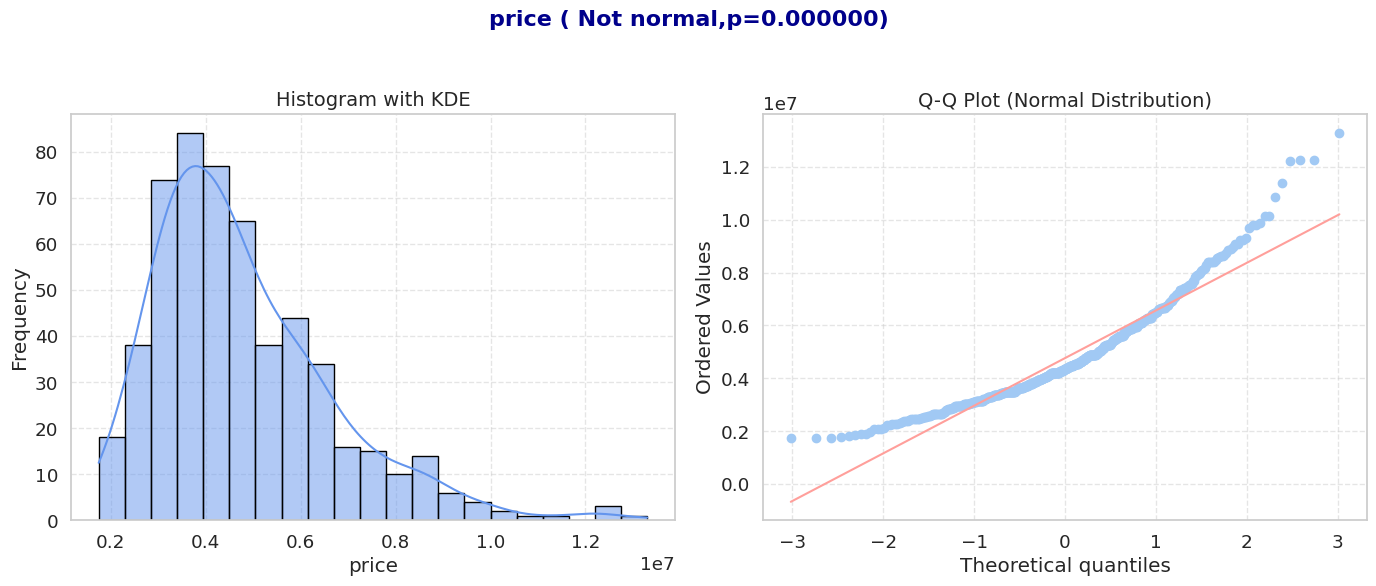

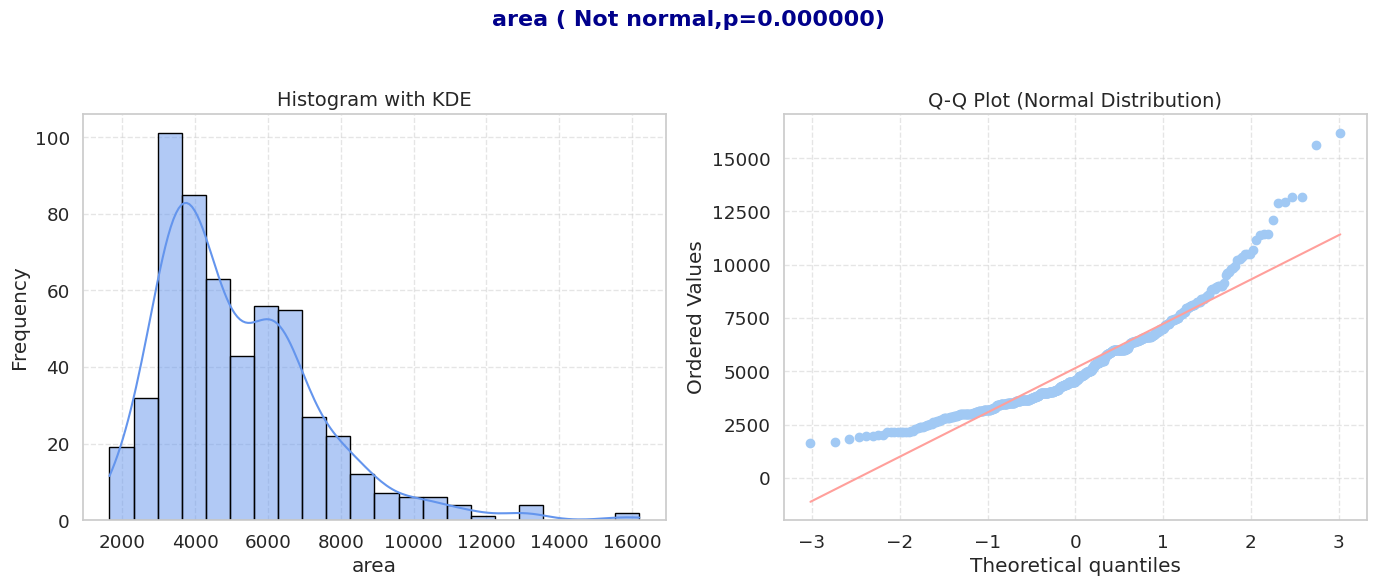

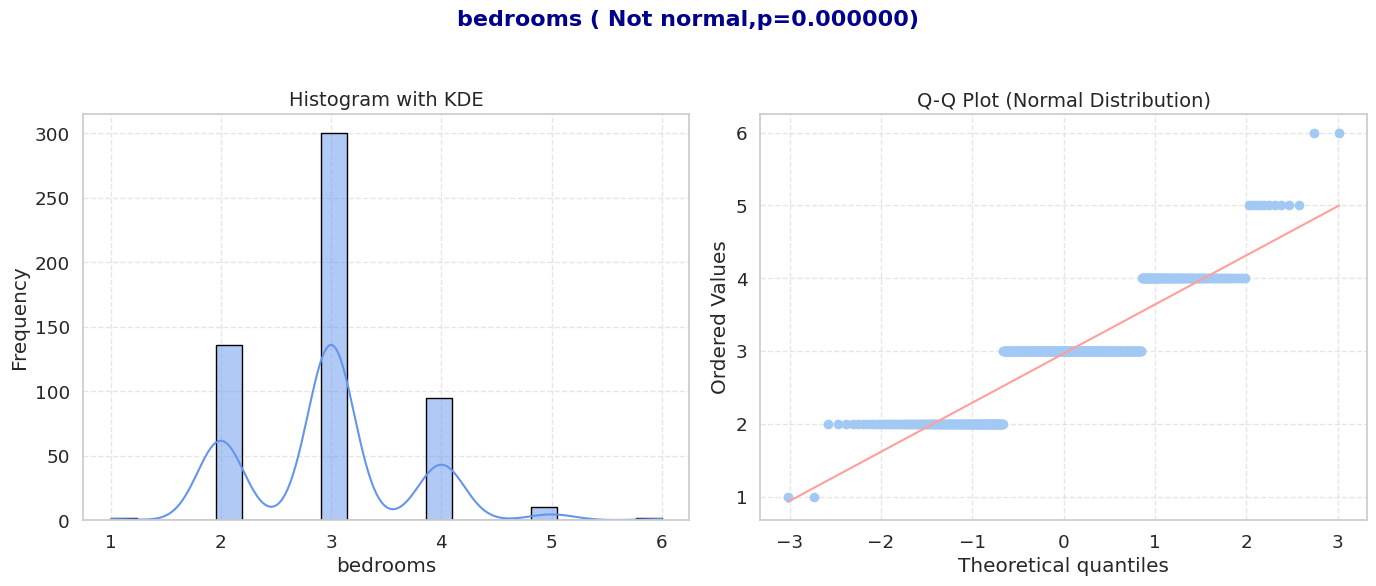

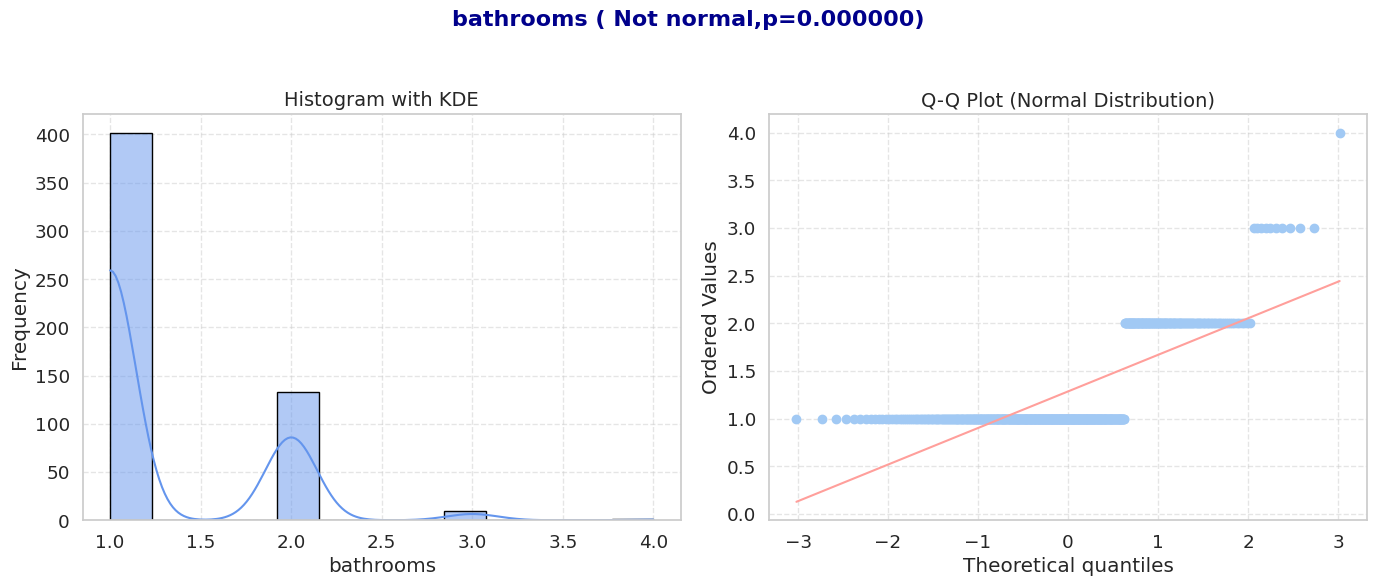

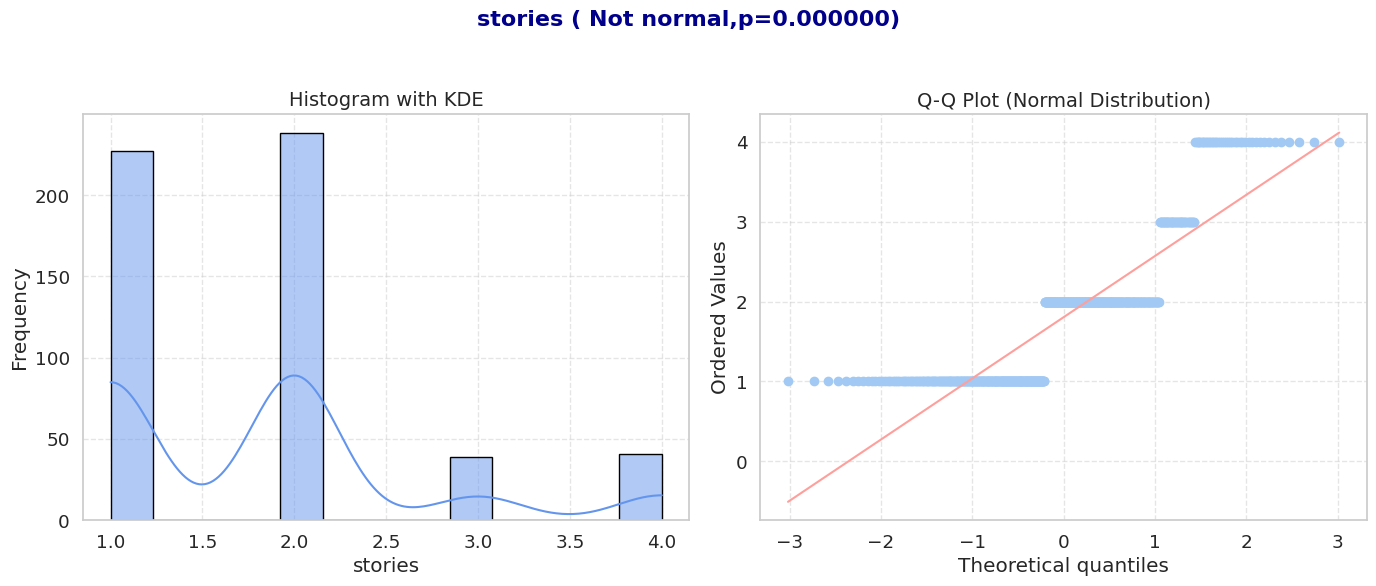

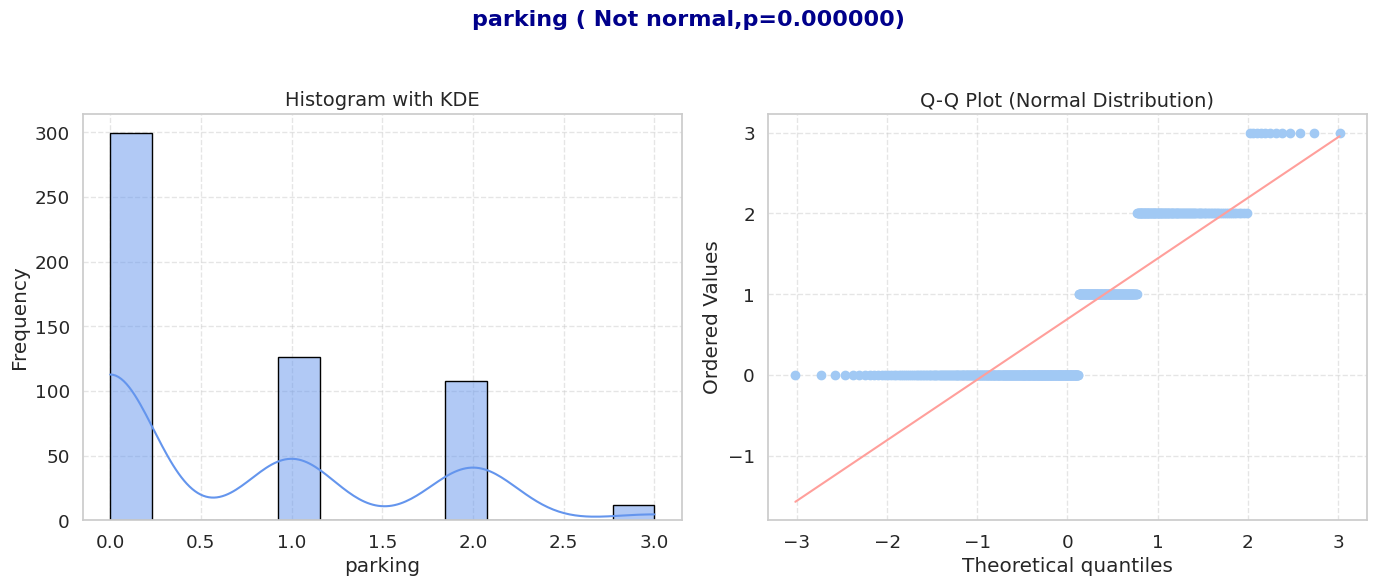

In [19]:
# Run for all numerical columns (or subset if needed)
numerical_cols = df.select_dtypes(include='number').columns

for col in numerical_cols:
    plot_distruibution_and_qq(df,col)

In [20]:
# Function to check if columns has outlier using IQR
def has_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR= Q3 -Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((series <lower) | (series > upper)).any()


# Function to run statistical normality tests

def normality_tests(series):
    results ={}

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = stats.shapiro(series)
    results['Shapiro-Wilk'] = (shapiro_p,'Normal' if shapiro_p > 0.05 else 'Not Normal')

    # D'Agostino and Pearson's K2 test
    dagostino_stat,dagostino_p = stats.normaltest(series)
    results['DAgostino K2']= (dagostino_p, "Normal" if dagostino_p > 0.05 else "Not Normal")

    # Anderson Darling Test
    ad_result = stats.anderson(series,dist='norm')
    ad_stat = ad_result.statistic
    ad_crit_5 = ad_result.critical_values[2] #5%
    ad_interpretation = 'Normal' if ad_stat < ad_crit_5 else 'Not Normal'
    results['Anderson-Darling'] = (f"stat={ad_stat:.3f}< crit={ad_crit_5:.3f}",ad_interpretation)
    return results


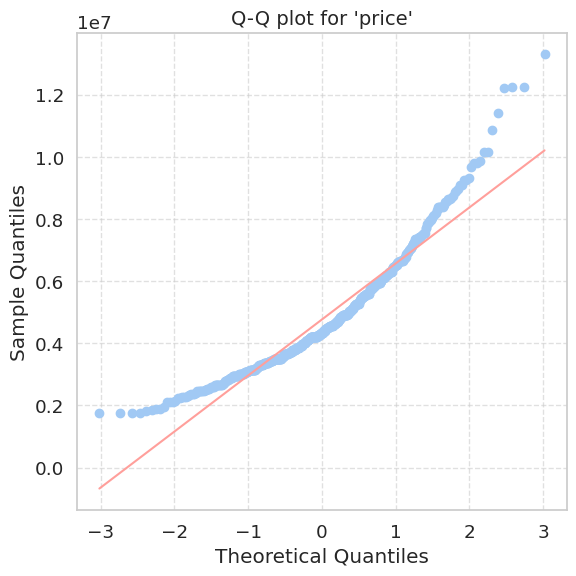


 Normality tests for 'price' : 

 . Shapiro-Wilk: 3.154903020052395e-16 -> Not Normal
 . DAgostino K2: 7.060096507152579e-26 -> Not Normal
 . Anderson-Darling: stat=10.445< crit=0.781 -> Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely normal
 - p <= 0.05 -> Data is NOT normal
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal


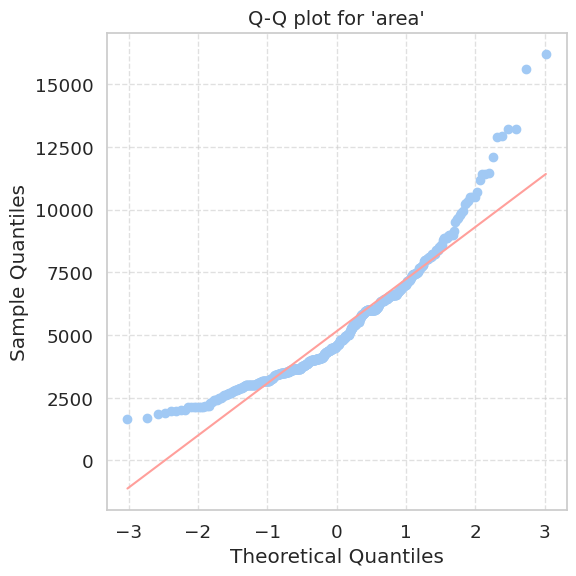


 Normality tests for 'area' : 

 . Shapiro-Wilk: 2.5971521072657363e-17 -> Not Normal
 . DAgostino K2: 6.732585875624122e-31 -> Not Normal
 . Anderson-Darling: stat=10.701< crit=0.781 -> Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely normal
 - p <= 0.05 -> Data is NOT normal
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal


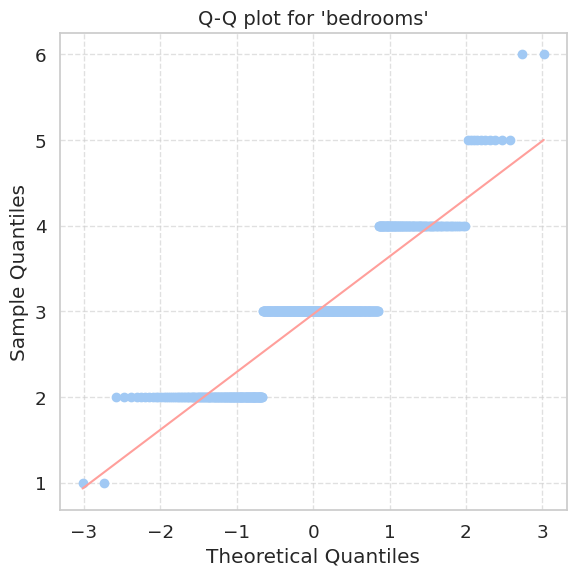


 Normality tests for 'bedrooms' : 

 . Shapiro-Wilk: 1.1082903223676697e-23 -> Not Normal
 . DAgostino K2: 7.838900986317864e-07 -> Not Normal
 . Anderson-Darling: stat=44.039< crit=0.781 -> Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely normal
 - p <= 0.05 -> Data is NOT normal
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal


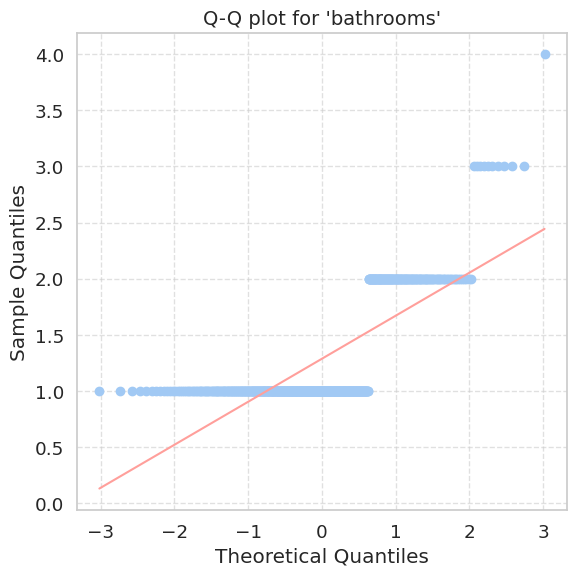


 Normality tests for 'bathrooms' : 

 . Shapiro-Wilk: 3.137100962820001e-34 -> Not Normal
 . DAgostino K2: 6.151418308348752e-35 -> Not Normal
 . Anderson-Darling: stat=112.508< crit=0.781 -> Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely normal
 - p <= 0.05 -> Data is NOT normal
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal


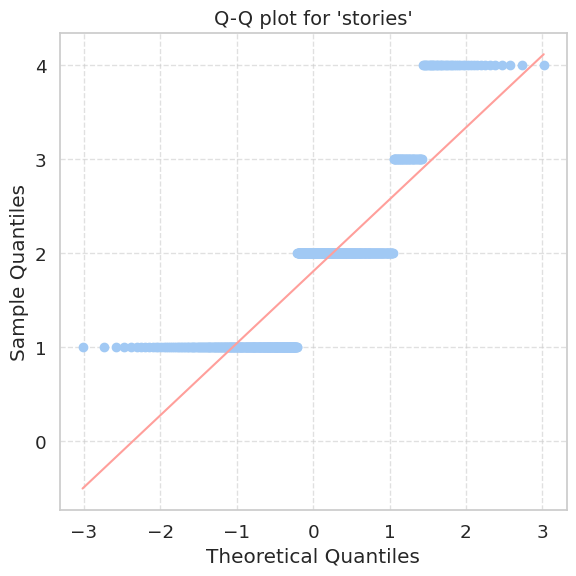


 Normality tests for 'stories' : 

 . Shapiro-Wilk: 8.280536002517623e-27 -> Not Normal
 . DAgostino K2: 1.7728939330977503e-18 -> Not Normal
 . Anderson-Darling: stat=47.223< crit=0.781 -> Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely normal
 - p <= 0.05 -> Data is NOT normal
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal


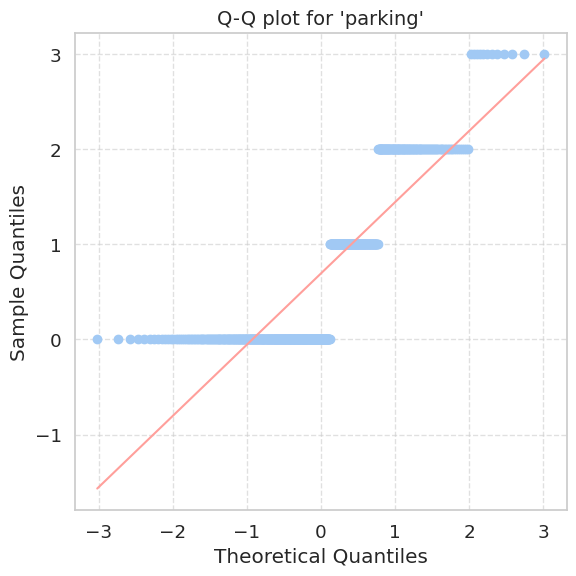


 Normality tests for 'parking' : 

 . Shapiro-Wilk: 5.920776429471877e-28 -> Not Normal
 . DAgostino K2: 5.837854178886895e-15 -> Not Normal
 . Anderson-Darling: stat=60.265< crit=0.781 -> Not Normal

 Interpretation:
 - p > 0.05 -> Data is likely normal
 - p <= 0.05 -> Data is NOT normal
 - For Anderson-Darling, if test statistic < critical value at 5%, then Normal


In [21]:
# Final function: Plot histogram with KDE (Plotly) + Q-Q plt (matplotlib) + print test result

def analyze_column(df,column):
    data = df[column].dropna()

    #Run Normality tests
    results = normality_tests(data)

    # ---- Plotly Histogram + KDE

    fig = px.histogram(data,x=column,marginal='rug',nbins=50,opacity=0.7,
                       title=f"<b>Histogram with KDE for '{column}' </br> <br><br><sup>Interactive plot - hover to explore</sup>",
                       template="plotly_white",histnorm=None)
    fig.update_traces(marker_color='cornflowerblue')
    fig.update_layout(
        xaxis_title=column,
        yaxis_title="Frequency",
        showlegend=False
    )

    fig.show()

    # ----- Q-Q plot using matplotlib -----------
    plt.figure(figsize=(6,6))
    stats.probplot(data,dist="norm",plot=plt)
    plt.title(f"Q-Q plot for '{column}'",fontsize=14)
    plt.xlabel("Theoretical Quantiles")
    plt.ylabel("Sample Quantiles")
    plt.grid(True,linestyle='--',alpha=0.6)
    plt.tight_layout()
    plt.show()

    #Show results

    print(f"\n Normality tests for '{column}' : \n")
    for test,(result,interp) in results.items():
        print(f" . {test}: {result} -> {interp}")
    print("\n Interpretation:") 
    print(" - p > 0.05 -> Data is likely normal")
    print(" - p <= 0.05 -> Data is NOT normal")  
    print(" - For Anderson-Darling, if test statistic < critical value at 5%, then Normal")

# Detect outlier columns
outlier_cols = [col for col in numerical_cols if has_outliers(df[col])]


#Run analysis for each column with outliers
for col in outlier_cols:
    analyze_column(df,col)


In [22]:
# Remve outliers

def remove_outliers_iqr(df,columns):
    df_clean = df.copy()

    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3-Q1
        

        lower_bound = Q1 - 1.5 *IQR
        upper_bound = Q3 - 1.5 * IQR

        # Keep only rows within the bounds
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    return df_clean

#Example usage
df_no_outliers = remove_outliers_iqr(df,numerical_cols)
print(f"Original dataset shape:{df.shape}")
print(f"After outlier removal: {df_no_outliers.shape}")



Original dataset shape:(545, 13)
After outlier removal: (1, 13)


In [23]:
# Add log-transformation

df['log_price'] = np.log1p(df['price']) #safer that log(price) if there are 0s

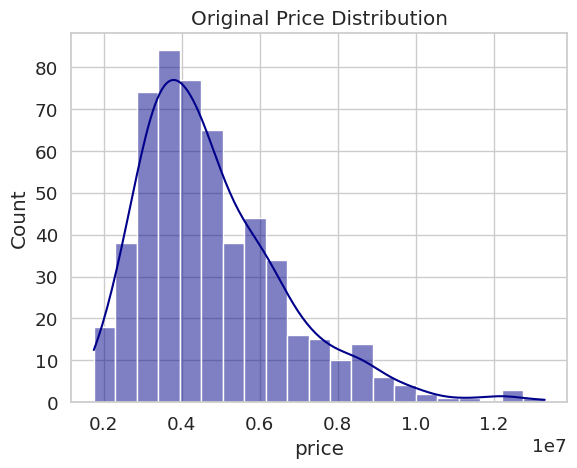

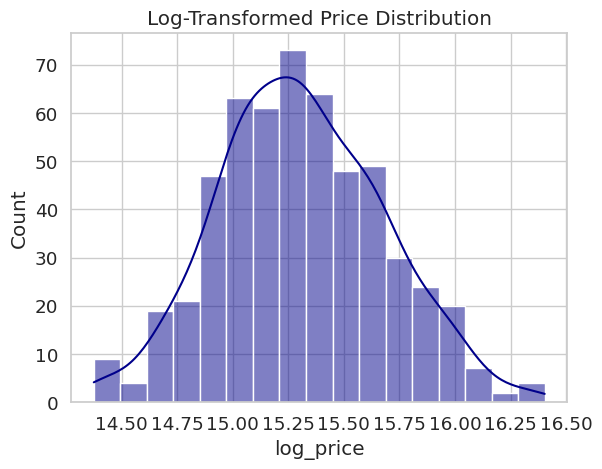

In [24]:
sns.histplot(df['price'],kde=True,color="darkblue")
plt.title("Original Price Distribution")
plt.show()

sns.histplot(df['log_price'],kde=True,color='darkblue')
plt.title("Log-Transformed Price Distribution")
plt.show()

In [25]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,log_price
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,16.403275
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,16.321037
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,16.321037
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,16.318175
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,16.250001


In [26]:
# Binary Categorical columns (yes/no)
binary_cols = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']

for col in binary_cols:
    df[col] = df[col].map({'yes':1,'no':0})

# One-hot encode non-binary column (furnishingstatus) if it exists
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [27]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log_price,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,16.403275,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,16.321037,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,16.321037,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,16.318175,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,16.250001,False,False


In [28]:
#define numerical features (excluding 'price' and 'log_price')
num_features = ['area','bedrooms','bathrooms','stories','parking']
scaler = StandardScaler()
df[num_features]= scaler.fit_transform(df[num_features])

In [29]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,log_price,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1,0,0,0,1,1.517692,1,16.403275,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,1,0,0,0,1,2.679409,0,16.321037,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1,0,1,0,0,1.517692,1,16.321037,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,1,0,1,0,1,2.679409,1,16.318175,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1,1,1,0,1,1.517692,0,16.250001,False,False


In [30]:
# Features (drop target and original price)

X =df.drop(['price','log_price'],axis=1)
y =df['log_price']

# Split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


# Train the model

In [31]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
# predict on test data(log scale)
y_pred_log = model.predict(X_test)

#convert predictions back to original price scale
y_pred = np.expm1(y_pred_log)
y_true =np.expm1(y_test)

#Evaluate 
r2 = r2_score(y_true,y_pred)
rmse = root_mean_squared_error(y_true,y_pred)
mae = mean_absolute_error(y_true,y_pred)

print(f"R score:{r2:.3f}")
print(f"RMSE:{rmse:.3f}")
print(f"MAE: {mae:.3f}")


R score:0.658
RMSE:1314648.195
MAE: 960123.173


In [33]:
joblib.dump(model,"ML_model/linear_regression.pkl")


['ML_model/linear_regression.pkl']